---
format: 
  html:
    toc: true
    code-fold: true
execute:
  echo: true
  eval: false
---

# Modeling

In this section, I will construct the model using Random Forest Regressor from the scikit-learn library. The model will be split into 70% training data and 30% test data, and I will also use grid search to find the best hyperparameters for the model.

There will be 4 models in total, each with different features, and I will compare the performance of each model using the median absolute error and the R-squared score. The four models are:

- Model 1: No Spatial Features
- Model 2: with Spatial Features of 1 Nearest Neighbour
- Model 3: with Spatial Features of 3 Nearest Neighbour
- Model 4: with Spatial Features of 5 Nearest Neighbour

In summary, the steps to build a model are:

- Wrangle and understand data. 
- Train the model on the training data — the learning algorithm searches for the best model parameters
- Select the model that would be best for the dataset.
- Apply the model to new data to make predictions.

::: {.callout-important}
**Note: The data used in this analysis is from only July of each year, and for the sake of simplicity, I will use related years to name the data**
:::

## Preparation

Before constructing the model, I will first preprocess the data. Basically, I will use data of 2022 and 2023 to predict the data of 2024. The selected features are:

- `visits`: the number of visits to a place in 2023
- `visitors`: the number of visitors to a place in 2023
- `transactions`: the number of transactions in a place in 2023
- `spend`: the mean amount of money spent in a place of year 2022 and 2023

Moreover, I will also add the spatial features of 1, 3, and 5 nearest neighbours to the data. The spatial features are:

- `visits_neighbour`: the mean value of number of visits of the k nearest neighbours of a place in 2023
- `visitors_neighbour`: the mean value of the number of visitors of the k nearest neighbours of a place in 2023
- `transactions_neighbour`: the mean value of the number of transactions of the k nearest neighbours of a place in 2023

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
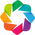

In [67]:
#| code-fold: True
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import holoviews as hv
import hvplot.pandas
hv.extension('bokeh')

np.random.seed(42)
pd.options.display.max_columns = 999
pd.set_option("display.float_format", "{:.2f}".format)

First, I will load the data and select the wanted columns.

In [8]:
#| code-fold: True

raw_data = gpd.read_file('../data/advan_sg.geojson')

# filter 2022, 2023, 2024 data only for the model
raw_data_2022 = raw_data.loc[raw_data['DATE_RANGE_START']==2022]
raw_data_2023 = raw_data.loc[raw_data['DATE_RANGE_START']==2023]
raw_data_2024 = raw_data.loc[raw_data['DATE_RANGE_START']==2024]

# merge into one dataframe
data = raw_data_2023.merge(raw_data_2022, on='PLACEKEY', suffixes=('_2023', '_2022'))
data = data.merge(raw_data_2024, on='PLACEKEY', how='right')
data = data.dropna()
data = data.drop(columns=['LOCATION_NAME_2023', 'TOP_CATEGORY_2023', 'LATITUDE_2023', 'LONGITUDE_2023', 'DATE_RANGE_START_2023', 'RAW_NUM_CUSTOMERS_2023', 'geometry_2023', 'LOCATION_NAME_2022', 'TOP_CATEGORY_2022', 'LATITUDE_2022', 'LONGITUDE_2022', 'DATE_RANGE_START_2022', 'RAW_VISIT_COUNTS_2022', 'RAW_VISITOR_COUNTS_2022', 'RAW_NUM_TRANSACTIONS_2022', 'RAW_NUM_CUSTOMERS_2022', 'geometry_2022', 'DATE_RANGE_START', 'RAW_VISIT_COUNTS', 'RAW_VISITOR_COUNTS', 'RAW_NUM_TRANSACTIONS', 'RAW_NUM_CUSTOMERS'])

data = data.rename(columns={'RAW_VISIT_COUNTS_2023': 'visits', 'RAW_VISITOR_COUNTS_2023': 'visitors', 'RAW_TOTAL_SPEND_2023': 'spend_2023', 'RAW_NUM_TRANSACTIONS_2023': 'transactions', 'RAW_TOTAL_SPEND_2022': 'spend_2022', 'RAW_TOTAL_SPEND': 'spend_2024'})

data['spend'] = (data['spend_2023'] + data['spend_2022']) / 2

data = gpd.GeoDataFrame(data, geometry='geometry')

data.head()

,PLACEKEY,visits,visitors,spend_2023,transactions,spend_2022,LOCATION_NAME,TOP_CATEGORY,LATITUDE,LONGITUDE,spend_2024,geometry,spend
0,zzw-224@628-pmf-skf,227.0,202.0,5442.35,152.0,17446.21,Misconduct Tavern,Restaurants and Other Eating Places,39.948709,-75.166626,6196.76,POINT (-75.16663 39.94871),11444.280
1,zzw-223@628-p7x-w6k,178.0,100.0,2782.23,180.0,4617.35,Pizza Roma,Restaurants and Other Eating Places,40.049594,-75.059819,3495.90,POINT (-75.05982 40.04959),3699.790
2,22x-223@628-pmb-fpv,273.0,171.0,1802.47,43.0,2955.04,Shaking Seafood,Restaurants and Other Eating Places,39.946982,-75.157365,2734.49,POINT (-75.15736 39.94698),2378.755
3,22d-222@628-pmb-6hq,186.0,174.0,1425.15,68.0,4052.00,DaMo Pasta Lab,Restaurants and Other Eating Places,39.949786,-75.160216,1146.45,POINT (-75.16022 39.94979),2738.575
6,225-222@628-pft-zpv,12.0,10.0,324.75,23.0,451.65,Wendy's,Restaurants and Other Eating Places,40.030377,-75.211174,261.88,POINT (-75.21117 40.03038),388.200


Then, I will calculate the spatial features of 1, 3, and 5 nearest neighbours using the `NearestNeighbors` class from the scikit-learn library.

In [9]:
def get_xy_from_geometry(df):
    """
    Return a numpy array with two columns, where the 
    first holds the `x` geometry coordinate and the second 
    column holds the `y` geometry coordinate
    """
    x = df.geometry.x
    y = df.geometry.y
    
    return np.column_stack((x, y)) # stack as columns

# Extract x/y for data
dataXY = get_xy_from_geometry(data)

dataXY.shape

(1890, 2)

In [14]:
from sklearn.neighbors import NearestNeighbors

# STEP 1: Define k values
k_values = [1, 3, 5]

# STEP 2: Initialize the NearestNeighbors algorithm with the maximum k
max_k = max(k_values)
nbrs = NearestNeighbors(n_neighbors=max_k)
nbrs.fit(dataXY)

# STEP 3: Get distances for sale to neighbors
dataDists, dataIndices = nbrs.kneighbors(dataXY)

In [15]:
# Define columns for which to calculate mean
columns = ["visits", "visitors", "transactions"]

# Loop through each k value
for k in k_values:
    for col in columns:
        # Calculate the mean for each point based on the k nearest neighbors
        data[f"{col}_k{k}"] = [
            data.iloc[indices[:k]][col].mean() for indices in dataIndices
        ]

data.head()

,PLACEKEY,visits,visitors,spend_2023,transactions,spend_2022,LOCATION_NAME,TOP_CATEGORY,LATITUDE,LONGITUDE,spend_2024,geometry,spend,visits_k1,visitors_k1,transactions_k1,visits_k3,visitors_k3,transactions_k3,visits_k5,visitors_k5,transactions_k5
0,zzw-224@628-pmf-skf,227.0,202.0,5442.35,152.0,17446.21,Misconduct Tavern,Restaurants and Other Eating Places,39.948709,-75.166626,6196.76,POINT (-75.16663 39.94871),11444.280,227.0,202.0,152.0,1231.666667,892.000000,78.000000,988.6,692.8,329.2
1,zzw-223@628-p7x-w6k,178.0,100.0,2782.23,180.0,4617.35,Pizza Roma,Restaurants and Other Eating Places,40.049594,-75.059819,3495.90,POINT (-75.05982 40.04959),3699.790,178.0,100.0,180.0,195.333333,158.333333,183.000000,859.4,620.0,796.6
2,22x-223@628-pmb-fpv,273.0,171.0,1802.47,43.0,2955.04,Shaking Seafood,Restaurants and Other Eating Places,39.946982,-75.157365,2734.49,POINT (-75.15736 39.94698),2378.755,273.0,171.0,43.0,135.333333,67.000000,28.333333,144.8,88.8,30.8
3,22d-222@628-pmb-6hq,186.0,174.0,1425.15,68.0,4052.00,DaMo Pasta Lab,Restaurants and Other Eating Places,39.949786,-75.160216,1146.45,POINT (-75.16022 39.94979),2738.575,186.0,174.0,68.0,1014.000000,758.333333,84.000000,1022.0,774.8,78.2
6,225-222@628-pft-zpv,12.0,10.0,324.75,23.0,451.65,Wendy's,Restaurants and Other Eating Places,40.030377,-75.211174,261.88,POINT (-75.21117 40.03038),388.200,12.0,10.0,23.0,281.333333,237.000000,222.333333,172.2,144.2,210.6


Finally, I will split the data into training and test data.

In [16]:
# Models
from sklearn.ensemble import RandomForestRegressor

# Model selection
from sklearn.model_selection import train_test_split, GridSearchCV

# Pipelines
from sklearn.pipeline import make_pipeline

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [17]:
# Split the data 70/30
train_set, test_set = train_test_split(data, test_size=0.3, random_state=7)

# the target labels
y_train = train_set["spend_2024"]
y_test = test_set["spend_2024"]

## Building the Model

In this section, I will build four models using Random Forest Regressor from the scikit-learn library, and give the detailed steps of the model construction.

### Model 1: No Spatial Features

For the first model, I will use the data without the spatial features. There will be both numerical and categorical features in the data, so I will use the `ColumnTransformer` class from the scikit-learn library to preprocess the data.

In [18]:
# Numerical columns
num_cols = [
    "visits",
    "visitors",
    "transactions",
    "spend"
]

# Categorical columns
cat_cols = [
    "TOP_CATEGORY"
]

# Set up the column transformer with two transformers
# ----> Scale the numerical columns
# ----> One-hot encode the categorical columns

transformer = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

Then, I will build a pipeline to process the data and build the model. The pipeline will consist of the `ColumnTransformer` class and the `RandomForestRegressor` class.

In [19]:
# Initialize the pipeline
pipe = make_pipeline(
    transformer, RandomForestRegressor(random_state=7)
)

Finally, I will use grid search to find the best hyperparameters for the model. Three hyperparameters will be tuned: `n_estimators`, `max_depth`, and `min_samples_split`.

In [20]:
# Use GridSearchCV to find the best hyperparameters
# Set up GridSearchCV
param_grid = {
    'randomforestregressor__n_estimators': [50, 100, 200],
    'randomforestregressor__max_depth': [20, 50, None],
    'randomforestregressor__min_samples_split': [2, 4, 6]
}

# Set up the grid search
grid_search = GridSearchCV(
    pipe, 
    param_grid, 
    cv=5, # 5-fold cross-validation
    scoring='r2', # Use R^2 as the scoring metric
    n_jobs=-1 # Use all available cpu cores
    )

In [21]:
# Fit the model
grid_search.fit(train_set, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['visits',
                                                                          'visitors',
                                                                          'transactions',
                                                                          'spend']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['TOP_CATEGORY'])])),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=7))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [20, 50, None],
                         'randomforestregressor__min_samples_split': [2, 4, 6],
                         'randomforestregressor__n_estimators': [50, 100, 200]},
             scoring='r2')

In [22]:
# Get the best hyperparameters
best_hyperparameters_1 = grid_search.best_params_

# Evaluate on test set
model_1 = grid_search.best_estimator_
test_score_1 = model_1.score(test_set, y_test)

### Model 2: with Spatial Features of 1 Nearest Neighbour

For the second model, I will use the data with spatial features of the nearest neighbor. The rest of the steps are the same as the first model.

In [23]:
#| code-fold: True

# Numerical columns
num_cols = [
    "visits",
    "visitors",
    "transactions",
    "spend",
    "visits_k1",
    "visitors_k1",
    "transactions_k1",
]

# Categorical columns
cat_cols = [
    "TOP_CATEGORY"
]

# Set up the column transformer with two transformers
# ----> Scale the numerical columns
# ----> One-hot encode the categorical columns

transformer = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

# Initialize the pipeline
pipe = make_pipeline(
    transformer, RandomForestRegressor(random_state=7)
)

# Use GridSearchCV to find the best hyperparameters
# Set up GridSearchCV
param_grid = {
    'randomforestregressor__n_estimators': [50, 100, 200],
    'randomforestregressor__max_depth': [20, 50, None],
    'randomforestregressor__min_samples_split': [2, 4, 6]
}

# Set up the grid search
grid_search = GridSearchCV(
    pipe, 
    param_grid, 
    cv=5, # 5-fold cross-validation
    scoring='r2', # Use R^2 as the scoring metric
    n_jobs=-1 # Use all available cpu cores
    )

# Fit the model
grid_search.fit(train_set, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['visits',
                                                                          'visitors',
                                                                          'transactions',
                                                                          'spend',
                                                                          'visits_k1',
                                                                          'visitors_k1',
                                                                          'transactions_k1']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['TOP_CATEGORY'])])),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=7))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [20, 50, None],
                         'randomforestregressor__min_samples_split': [2, 4, 6],
                         'randomforestregressor__n_estimators': [50, 100, 200]},
             scoring='r2')

In [24]:
# Get the best hyperparameters
best_hyperparameters_2 = grid_search.best_params_

# Evaluate on test set
model_2 = grid_search.best_estimator_
test_score_2 = model_2.score(test_set, y_test)

### Model 3: with Spatial Features of 3 Nearest Neighbours

For the third model, I will use the data with spatial features of 3 nearest neighbor. The rest of the steps are the same as the previous models.

In [25]:
#| code-fold: True

# Numerical columns
num_cols = [
    "visits",
    "visitors",
    "transactions",
    "spend",
    "visits_k3",
    "visitors_k3",
    "transactions_k3",
]

# Categorical columns
cat_cols = [
    "TOP_CATEGORY"
]

# Set up the column transformer with two transformers
# ----> Scale the numerical columns
# ----> One-hot encode the categorical columns

transformer = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

# Initialize the pipeline
pipe = make_pipeline(
    transformer, RandomForestRegressor(random_state=7)
)

# Use GridSearchCV to find the best hyperparameters
# Set up GridSearchCV
param_grid = {
    'randomforestregressor__n_estimators': [50, 100, 200],
    'randomforestregressor__max_depth': [20, 50, None],
    'randomforestregressor__min_samples_split': [2, 4, 6]
}

# Set up the grid search
grid_search = GridSearchCV(
    pipe, 
    param_grid, 
    cv=5, # 5-fold cross-validation
    scoring='r2', # Use R^2 as the scoring metric
    n_jobs=-1 # Use all available cpu cores
    )

# Fit the model
grid_search.fit(train_set, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['visits',
                                                                          'visitors',
                                                                          'transactions',
                                                                          'spend',
                                                                          'visits_k3',
                                                                          'visitors_k3',
                                                                          'transactions_k3']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['TOP_CATEGORY'])])),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=7))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [20, 50, None],
                         'randomforestregressor__min_samples_split': [2, 4, 6],
                         'randomforestregressor__n_estimators': [50, 100, 200]},
             scoring='r2')

In [26]:
# Get the best hyperparameters
best_hyperparameters_3 = grid_search.best_params_

# Evaluate on test set
model_3 = grid_search.best_estimator_
test_score_3 = model_3.score(test_set, y_test)

### Model 4: with Spatial Features of 5 Nearest Neighbours

For the fourth model, I will use the data with spatial features of 5 nearest neighbor. The rest of the steps are the same as the previous models.

In [27]:
#| code-fold: True

# Numerical columns
num_cols = [
    "visits",
    "visitors",
    "transactions",
    "spend",
    "visits_k5",
    "visitors_k5",
    "transactions_k5",
]

# Categorical columns
cat_cols = [
    "TOP_CATEGORY"
]

# Set up the column transformer with two transformers
# ----> Scale the numerical columns
# ----> One-hot encode the categorical columns

transformer = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

# Initialize the pipeline
pipe = make_pipeline(
    transformer, RandomForestRegressor(random_state=7)
)

# Use GridSearchCV to find the best hyperparameters
# Set up GridSearchCV
param_grid = {
    'randomforestregressor__n_estimators': [50, 100, 200],
    'randomforestregressor__max_depth': [20, 50, None],
    'randomforestregressor__min_samples_split': [2, 4, 6]
}

# Set up the grid search
grid_search = GridSearchCV(
    pipe, 
    param_grid, 
    cv=5, # 5-fold cross-validation
    scoring='r2', # Use R^2 as the scoring metric
    n_jobs=-1 # Use all available cpu cores
    )

# Fit the model
grid_search.fit(train_set, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['visits',
                                                                          'visitors',
                                                                          'transactions',
                                                                          'spend',
                                                                          'visits_k5',
                                                                          'visitors_k5',
                                                                          'transactions_k5']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['TOP_CATEGORY'])])),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=7))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_depth': [20, 50, None],
                         'randomforestregressor__min_samples_split': [2, 4, 6],
                         'randomforestregressor__n_estimators': [50, 100, 200]},
             scoring='r2')

In [28]:
# Get the best hyperparameters
best_hyperparameters_4 = grid_search.best_params_

# Evaluate on test set
model_4 = grid_search.best_estimator_
test_score_4 = model_4.score(test_set, y_test)

## Model Comparison

In this section, I will compare the performance of the four models using the median absolute error and the R-squared score.

Fisrt, let's have a look at the hyperparameters and the R-squared score of each model in the table below.

In [29]:
model_performance = pd.DataFrame({
    "Name": ["Model 1", "Model 2", "Model 3", "Model 4"],
    "Features": ["No spatial features", "with k=1 nearest neigbor", "with k=3 nearest neigbor", "with k=5 nearest neigbor"],
    "R-squared": [test_score_1, test_score_2, test_score_3, test_score_4]
})

model_performance

,Name,Features,R-squared
0,Model 1,No spatial features,0.725692
1,Model 2,with k=1 nearest neigbor,0.735239
2,Model 3,with k=3 nearest neigbor,0.718237
3,Model 4,with k=5 nearest neigbor,0.738747


We can see that the best model is **Model 4** for now, which has the highest R-squared score. The model has the following hyperparameters:

In [30]:
print(best_hyperparameters_4)

{'randomforestregressor__max_depth': 20, 'randomforestregressor__min_samples_split': 2, 'randomforestregressor__n_estimators': 200}


Now, Let's compare the performance of the four models using the **median absolute error**. The median absolute error is a robust metric that is less sensitive to outliers compared to the mean squared error. The lower the median absolute error, the better the model. The results are shown in the table below.

In [31]:
# Predict the values for the test set using the best model
y_pred_1 = model_1.predict(test_set)
y_pred_2 = model_2.predict(test_set)
y_pred_3 = model_3.predict(test_set)
y_pred_4 = model_4.predict(test_set)

# Add predicted values to the DataFrame
test_set_results = test_set.copy() 
test_set_results['predicted_1'] = y_pred_1
test_set_results['predicted_2'] = y_pred_2
test_set_results['predicted_3'] = y_pred_3
test_set_results['predicted_4'] = y_pred_4

# Calculate absolute error
test_set_results['abs_error_1'] = abs(test_set_results['predicted_1'] - test_set_results['spend_2024'])
test_set_results['abs_error_2'] = abs(test_set_results['predicted_2'] - test_set_results['spend_2024'])
test_set_results['abs_error_3'] = abs(test_set_results['predicted_3'] - test_set_results['spend_2024'])
test_set_results['abs_error_4'] = abs(test_set_results['predicted_4'] - test_set_results['spend_2024'])

# Calculate median absolute error
mae_1 = test_set_results['abs_error_1'].median()
mae_2 = test_set_results['abs_error_2'].median()
mae_3 = test_set_results['abs_error_3'].median()
mae_4 = test_set_results['abs_error_4'].median()

# Create a DataFrame with the results
model_results = pd.DataFrame({
    "Model": ["Model 1", "Model 2", "Model 3", "Model 4"],
    "Median Absolute Error": [mae_1, mae_2, mae_3, mae_4]
})

model_results

,Model,Median Absolute Error
0,Model 1,751.250520
1,Model 2,763.960198
2,Model 3,776.700924
3,Model 4,729.354195


Still, **Model 4** is the best model with the lowest median absolute error. Thus, we can conclude that **Model 4** is the best model among the four models.

## Prediction

In this section, I will use the best model to predict the spend data of 2025 using the data of 2024. The predicted spend data will be visualized using a map.

First, let's preprocess the data of 2024 and add the spatial features of 5 nearest neighbours. 

In [32]:
data_2024 = raw_data_2024.copy().merge(raw_data_2023, on='PLACEKEY', suffixes=('', '_2023'))

data_2024 = data_2024.drop(columns=['DATE_RANGE_START', 'RAW_NUM_CUSTOMERS', 'RAW_VISIT_COUNTS_2023', 'RAW_VISITOR_COUNTS_2023', 'RAW_NUM_TRANSACTIONS_2023', 'RAW_NUM_CUSTOMERS_2023', 'geometry_2023', 'DATE_RANGE_START_2023', 'LOCATION_NAME_2023', 'TOP_CATEGORY_2023', 'LATITUDE_2023', 'LONGITUDE_2023'])

data_2024 = data_2024.rename(columns={'RAW_VISIT_COUNTS': 'visits', 'RAW_VISITOR_COUNTS': 'visitors', 'RAW_TOTAL_SPEND': 'spend_2024', 'RAW_NUM_TRANSACTIONS': 'transactions', 'RAW_TOTAL_SPEND_2023': 'spend_2023'})

data_2024['spend'] = (data_2024['spend_2024'] + data_2024['spend_2023']) / 2

In [33]:
data_2024XY = get_xy_from_geometry(data_2024)

# STEP 1: Define k values
k = 5
nbrs = NearestNeighbors(n_neighbors=k)

# STEP 2: Fit the algorithm on the "neighbors" dataset
nbrs.fit(data_2024XY)

# STEP 3: Get distances for sale to neighbors
dataDists, dataIndices = nbrs.kneighbors(data_2024XY)

# Define columns for which to calculate mean
columns = ["visits", "visitors", "transactions"]


Here, we have prepared the data for the prediction, as shown below. Now, let's predict the spend data of 2025 using the best model.

In [34]:
for col in columns:
    # Calculate the mean for each point based on the k nearest neighbors
    data_2024[f"{col}_k5"] = [
        data_2024.iloc[indices[:5]][col].mean() for indices in dataIndices
    ]

data_2024.head()

,PLACEKEY,LOCATION_NAME,TOP_CATEGORY,LATITUDE,LONGITUDE,visits,visitors,spend_2024,transactions,geometry,spend_2023,spend,visits_k5,visitors_k5,transactions_k5
0,zzw-224@628-pmf-skf,Misconduct Tavern,Restaurants and Other Eating Places,39.948709,-75.166626,247.0,218.0,6196.76,155.0,POINT (-75.16663 39.94871),5442.35,5819.555,905.8,582.0,309.6
1,zzw-223@628-p7x-w6k,Pizza Roma,Restaurants and Other Eating Places,40.049594,-75.059819,155.0,127.0,3495.90,204.0,POINT (-75.05982 40.04959),2782.23,3139.065,5316.2,2388.0,547.6
2,22x-223@628-pmb-fpv,Shaking Seafood,Restaurants and Other Eating Places,39.946982,-75.157365,251.0,135.0,2734.49,74.0,POINT (-75.15736 39.94698),1802.47,2268.480,93.2,53.0,30.6
3,22d-222@628-pmb-6hq,DaMo Pasta Lab,Restaurants and Other Eating Places,39.949786,-75.160216,178.0,178.0,1146.45,43.0,POINT (-75.16022 39.94979),1425.15,1285.800,902.8,628.8,72.8
4,zzw-222@628-p9w-zj9,Little Istanbul,Restaurants and Other Eating Places,40.119755,-75.018108,804.0,523.0,3204.47,51.0,POINT (-75.01811 40.11975),1758.69,2481.580,581.6,370.4,303.4


In [94]:
data_2024_results = data_2024.copy()

data_2024_results['predicted_spend_2025'] = model_4.predict(data_2024_results)

# Sort by visit counts so that the largest points are plotted on top
data_2024_results = gpd.GeoDataFrame(data_2024_results, geometry='geometry')
data_2024_results = data_2024_results.sort_values(by='predicted_spend_2025')


The result of the prediction is shown in the table below. To better understand the trend of the income data, I have added the result to the previous data. From the table and chart below, it can be found that the predicted total of 2025 will be much lower than the actual income data of 2024, and just slightly higher than the lowest point of 2020. However, when it turns to the average income, the predicted data of 2025 is higher than the actual data of 2021. But there is still a drop compared to the actual data of 2024.

In [109]:
advan_sg = gpd.read_file('../data/advan_sg.geojson')

summary_table = advan_sg.groupby('DATE_RANGE_START').sum(numeric_only=True).drop(columns=['LATITUDE', 'LONGITUDE'])
summary_table_2 = advan_sg.groupby('DATE_RANGE_START').mean(numeric_only=True).drop(columns=['LATITUDE', 'LONGITUDE'])

summary_pred = data_2024_results.sum(numeric_only=True).to_frame().T
summary_pred_2 = data_2024_results.mean(numeric_only=True).to_frame().T

result = summary_table['RAW_TOTAL_SPEND']

mean_spend = summary_table_2['RAW_TOTAL_SPEND']
result = result.to_frame(name="Total Spend")
result['Mean Spend'] = mean_spend

result.loc[2025] = [summary_pred.loc[0, 'predicted_spend_2025'], summary_pred_2.loc[0, 'predicted_spend_2025']]

result = result.reset_index()

result.columns = ['year', 'Total Income', 'Mean Income']

result

,year,Total Income,Mean Income
0,2019,18602269.20,6508.84
1,2020,13145216.02,5067.55
2,2021,16743947.70,5852.48
3,2022,21524058.02,7004.25
4,2023,19350828.55,6801.70
5,2024,18474501.11,7051.34
6,2025,14411266.08,6365.40


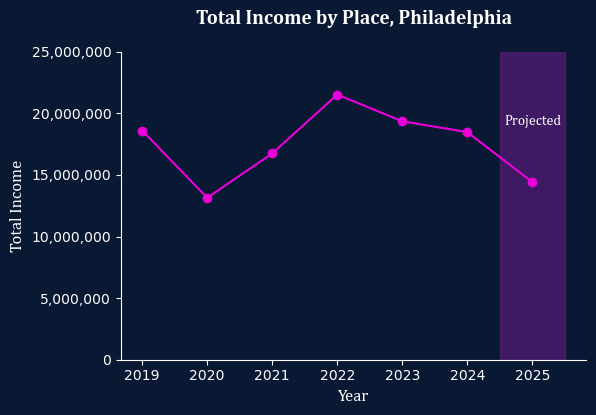

In [111]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Adjusted axis and title font properties
axis_fontdict = {'fontsize': 12, 'family': 'Cambria', 'color': 'white'}
title_fontdict = {'fontsize': 14, 'fontweight': 'bold', 'family': 'Cambria', 'color': 'white'}

fig, ax = plt.subplots(figsize=(6, 4))

# Plotting
result.plot(
    x='year', 
    y='Total Income',
    marker='o',
    color='#ea00d9',
    legend=False,
    ax=ax
)

# Setting axis labels and title
ax.set_xlabel('Year', fontdict=axis_fontdict)
ax.set_ylabel('Total Income', fontdict=axis_fontdict)
ax.set_title('Total Income by Place, Philadelphia', fontdict=title_fontdict, pad=20)

# Customize axis colors
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')  # X-axis ticks
ax.tick_params(axis='y', colors='white')  # Y-axis ticks

# Customize spines
ax.spines['bottom'].set_color('white') 
ax.spines['left'].set_color('white')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Highlight the projected year
ax.axvspan(2024.5, 2025.5, color='#711C91', alpha=0.5, zorder=0)

# Add "Projected Total Spend" label on the plot
ax.text(2025, result['Total Income'].max() * 0.9, 'Projected',
        fontsize=10, color='white', ha='center', va='center', family='Cambria')

# Customize ticks
ax.set_xticks(range(2019, 2026, 1))
ax.set_yticks(range(0, 30000000, 5000000))

# Turn off scientific notation on y-axis
ax.get_yaxis().get_major_formatter().set_scientific(False)
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{x:,.0f}"))

# Set the background colors
fig.set_facecolor('#091833')
ax.set_facecolor('#091833')

plt.show()


In terms of the spatial distribution of the spend data, the map below shows that the higher points are still mainly located in the city center and spread in other areas, which is consistent with the previous years. 

In [112]:
city = gpd.read_file('../data/City_Limits.geojson')

# City plot
city_plot = city.hvplot(geo=True, alpha=0.5, line_color='black', line_width=1, color='white', hover=False, crs=4326)


results_plot = data_2024_results.hvplot(
    geo=True,
    c='predicted_spend_2025', 
    cmap='viridis', 
    hover_cols=['LOCATION_NAME', 'predicted_spend_2025'], 
    dynamic=False,
    width=800,
    height=600,
    crs=4326,
    title="Total Income by Place",
    xlabel="Longitude",
    ylabel="Latitude",
    line_color='white',
    line_width=0.3,
    clim=(0, 20000)
)

city_plot * results_plot

:Overlay
   .Polygons.I :Polygons   [Longitude,Latitude]
   .Points.I   :Points   [Longitude,Latitude]   (predicted_spend_2025,LOCATION_NAME)